# Libraries

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [10]:
#Import Dataset
exercise = sns.load_dataset('exercise')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

In [11]:
df = pd.read_csv("C:/Users/byeongwan/OneDrive/desktop/archive/Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


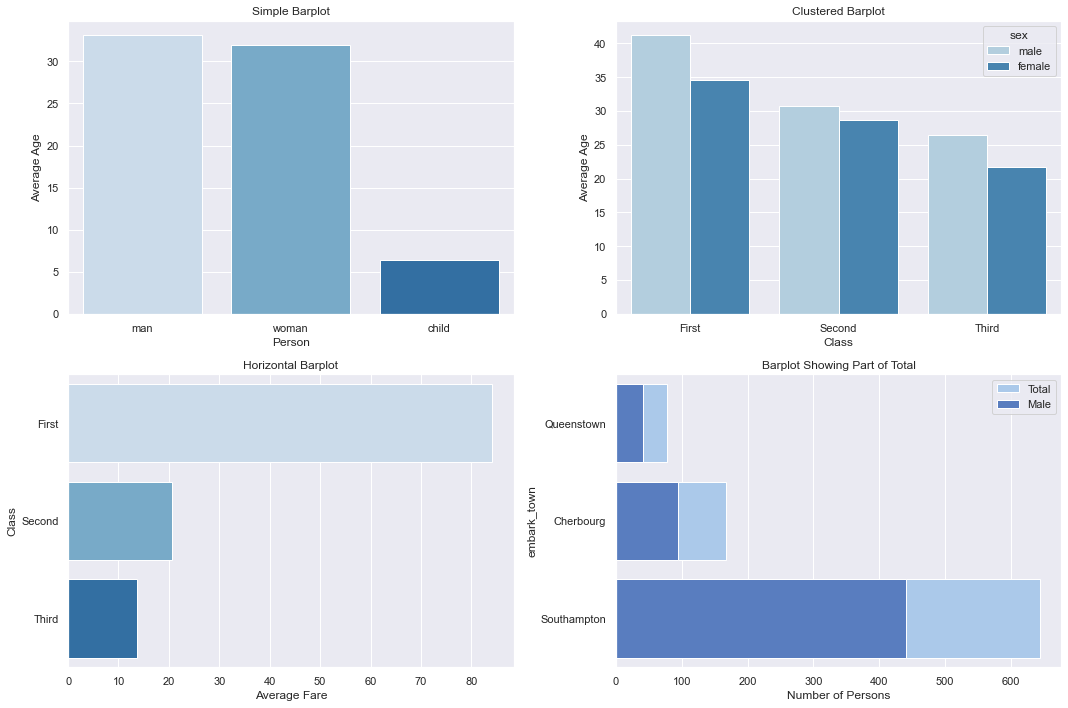

In [12]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Simple barplot
sns.barplot(data=titanic, x="who", y="age", estimator='mean', 
            errorbar=None, ax= ax[0,0], palette='Blues')
ax[0,0].set_title('Simple Barplot')
ax[0,0].set_xlabel('Person')
ax[0,0].set_ylabel('Average Age')

# Clustered barplot
sns.barplot(data=titanic, x='class', y='age', hue='sex', 
            estimator='mean', errorbar=None, ax= ax[0,1], palette='Blues')
ax[0,1].set_title('Clustered Barplot')
ax[0,1].set_xlabel('Class')
ax[0,1].set_ylabel('Average Age')

# Horizontal barplot
sns.barplot(data=titanic, x="fare", y="class", estimator='mean', 
            errorbar=None, ax= ax[1,0], palette='Blues')
ax[1,0].set_title('Horizontal Barplot')
ax[1,0].set_xlabel('Average Fare')
ax[1,0].set_ylabel('Class')

#Prepare data for next plot
data = titanic.groupby('embark_town').agg({'who':'count','sex': lambda x: (x=='male').sum()}).reset_index()
data.rename(columns={'who':'total', 'sex':'male'}, inplace=True)
data.sort_values('total', inplace=True)

# Barplot Showing Part of Total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="embark_town", data=data,
            label="Total", color="b", ax=ax[1,1])  # Plot the total crashes

sns.set_color_codes("muted")
sns.barplot(x="male", y="embark_town", data=data,
            label="Male", color="b", ax=ax[1,1])  # Plot the crashes where alcohol was involved
ax[1,1].set_title('Barplot Showing Part of Total')
ax[1,1].set_xlabel('Number of Persons')
ax[1,1].legend(loc='upper right')

plt.tight_layout()
plt.show()

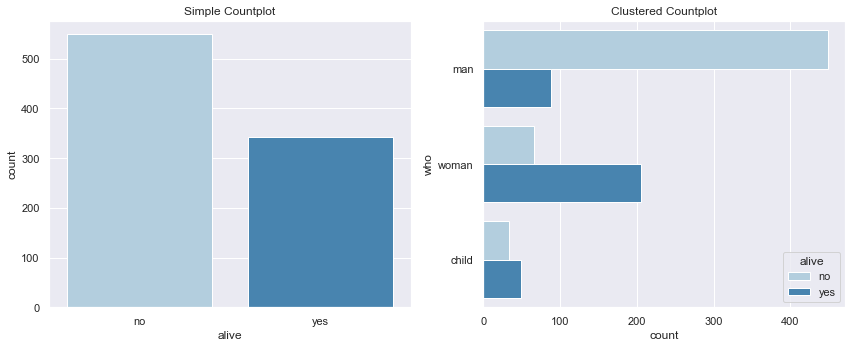

In [13]:
f, ax = plt.subplots(ncols=2,figsize=(12,5))

# Simple Countplot
sns.countplot(data=titanic, x='alive', 
              palette='Blues', ax=ax[0])
ax[0].set_title('Simple Countplot')

# Clustered Countplot
sns.countplot(data=titanic, y="who", 
            hue="alive", ax=ax[1], palette='Blues')
ax[1].set_title('Clustered Countplot')

plt.tight_layout()
plt.show();

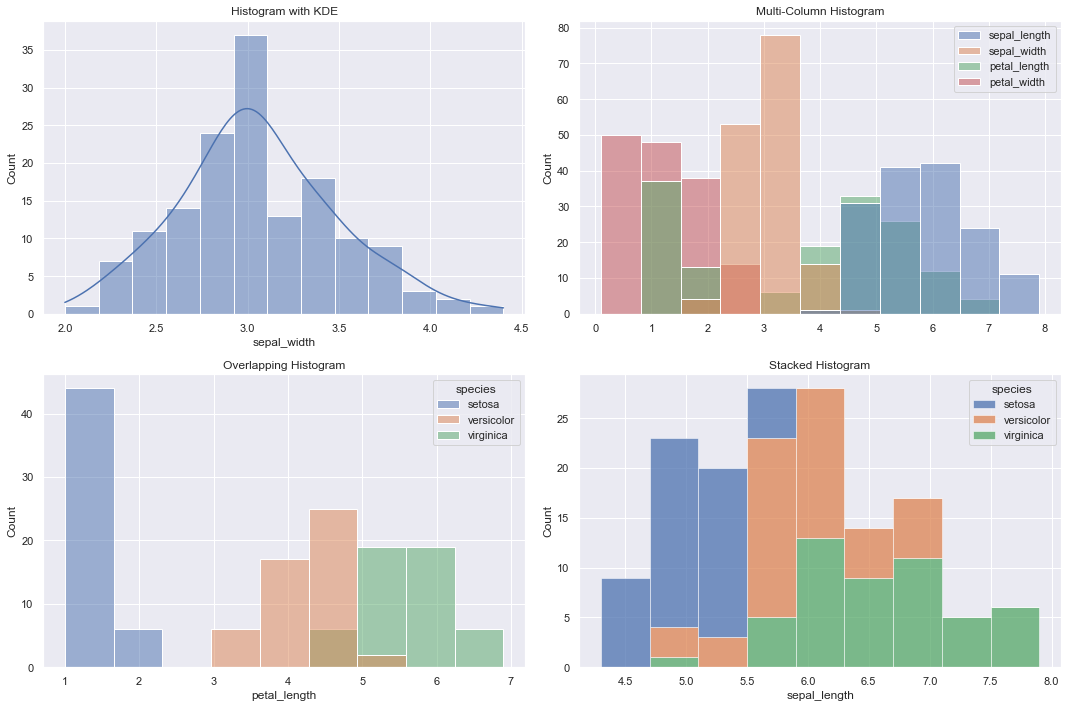

In [14]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Histogram with KDE
sns.histplot(data=iris, x='sepal_width', 
             kde=True, ax=ax[0,0])
ax[0,0].set_title('Histogram with KDE')

# Histogram with multiple features
sns.histplot(data=iris, ax=ax[0,1])
ax[0,1].set_title('Multi-Column Histogram')

#Overlapping Histogram
sns.histplot(data=iris, x='petal_length', 
             hue='species', ax=ax[1,0])
ax[1,0].set_title('Overlapping Histogram')

#Stacked Histogram
sns.histplot(iris, x='sepal_length', hue='species', multiple='stack',
             linewidth=0.5, ax=ax[1,1])
ax[1,1].set_title('Stacked Histogram')


plt.tight_layout()
plt.show()

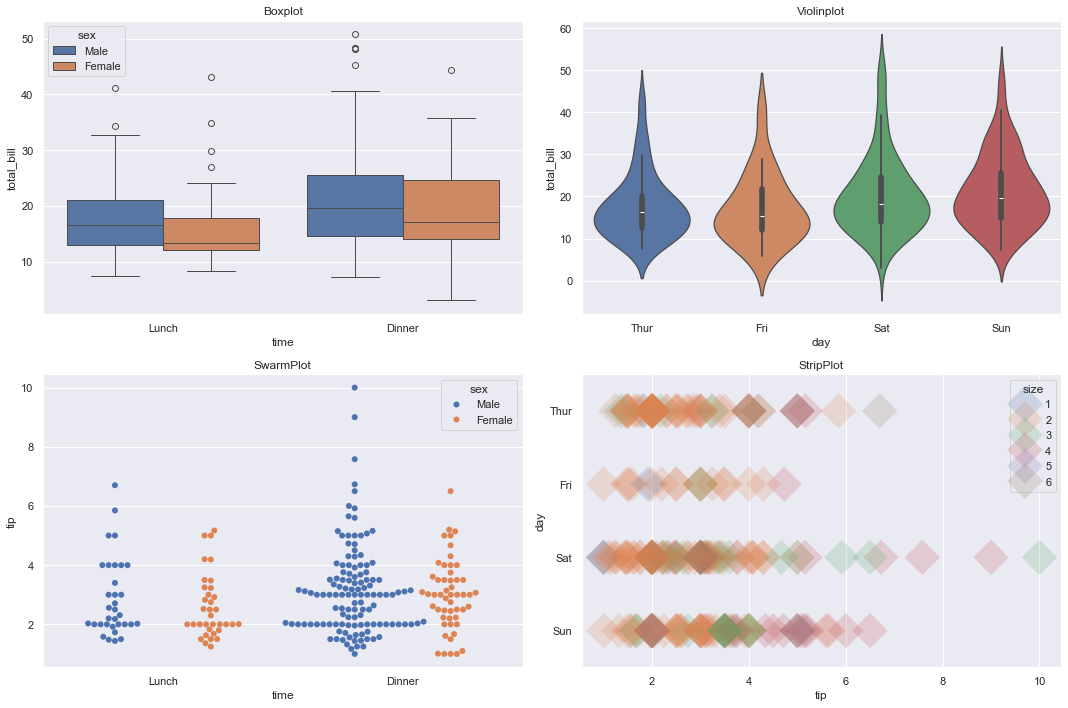

In [15]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Boxplot
sns.boxplot(data=tips, x='time', y='total_bill',
             hue='sex', ax=ax[0,0], palette='deep')
ax[0,0].set_title('Boxplot')

# Violinplot
sns.violinplot(data=tips, x='day', y='total_bill', 
               palette='deep', ax=ax[0,1])
ax[0,1].set_title('Violinplot')

#Swarmplot
sns.swarmplot(data=tips, x='time', y='tip', dodge=True,
              palette='deep', hue='sex', ax=ax[1,0], s=6)
ax[1,0].set_title('SwarmPlot')

#StripPlot
sns.stripplot(data=tips, x='tip', hue='size', y='day', s=25, alpha=0.2,
             jitter=False, marker='D',palette='deep', ax=ax[1,1])
ax[1,1].set_title('StripPlot')


plt.tight_layout()
plt.show()